Can we find a way to improve the user experience for question-askers on Stack Overflow?

2 obvious ways to approach this dataset are:

1. Predicting question 'quality'/'performance'
2. Predicting tags

For (1), we have to determine what that means, and how it can be quantified.
- Question score
- Answer count
- Answer score (avg or max)

For both problems, we need to process the data (stemming, lemmatization, etc) and determine whether to use the question title, body, or both.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
questions = pd.read_csv('../zippedData/Questions.csv', encoding='latin1')
answers = pd.read_csv('../zippedData/Answers.csv', encoding='latin1')
tags = pd.read_csv('../zippedData/Tags.csv')

In [3]:
display(questions.head())
display(answers.head())
display(tags.head())

,Id,OwnerUserId,CreationDate,Score,Title,Body
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...


,Id,OwnerUserId,CreationDate,ParentId,Score,Body
0,497,50.0,2008-08-02T16:56:53Z,469,4,<p>open up a terminal (Applications-&gt;Utilit...
1,518,153.0,2008-08-02T17:42:28Z,469,2,<p>I haven't been able to find anything that d...
2,536,161.0,2008-08-02T18:49:07Z,502,9,<p>You can use ImageMagick's convert utility f...
3,538,156.0,2008-08-02T18:56:56Z,535,23,<p>One possibility is Hudson. It's written in...
4,541,157.0,2008-08-02T19:06:40Z,535,20,"<p>We run <a href=""http://buildbot.net/trac"">B..."


,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python


In [45]:
display(questions.info())
display(answers.info())
display(tags.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607282 entries, 0 to 607281
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            607282 non-null  int64  
 1   OwnerUserId   601070 non-null  float64
 2   CreationDate  607282 non-null  object 
 3   Score         607282 non-null  int64  
 4   Title         607282 non-null  object 
 5   Body          607282 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 27.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987122 entries, 0 to 987121
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Id            987122 non-null  int64  
 1   OwnerUserId   981755 non-null  float64
 2   CreationDate  987122 non-null  object 
 3   ParentId      987122 non-null  int64  
 4   Score         987122 non-null  int64  
 5   Body          987122 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 45.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885078 entries, 0 to 1885077
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Tag     object
dtypes: int64(1), object(1)
memory usage: 28.8+ MB


None

In [4]:
questions_2 = questions.copy()

In [5]:
questions_2['title_length'] = questions_2['Title'].map(len)
questions_2['body_length'] = questions_2['Body'].map(len)

In [6]:
questions_2.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,70,445
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,39,314
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,51,624
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,46,91
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,62,317


In [7]:
len(answers[answers['ParentId']==469])

4

In [8]:
questions_2['year'] = questions_2['CreationDate'].map(lambda x: int(x[:4]))
questions_2.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length,year
0,469,147.0,2008-08-02T15:11:16Z,21,How can I find the full path to a font from it...,<p>I am using the Photoshop's javascript API t...,70,445,2008
1,502,147.0,2008-08-02T17:01:58Z,27,Get a preview JPEG of a PDF on Windows?,<p>I have a cross-platform (Python) applicatio...,39,314,2008
2,535,154.0,2008-08-02T18:43:54Z,40,Continuous Integration System for a Python Cod...,<p>I'm starting work on a hobby project with a...,51,624,2008
3,594,116.0,2008-08-03T01:15:08Z,25,cx_Oracle: How do I iterate over a result set?,<p>There are several ways to iterate over a re...,46,91,2008
4,683,199.0,2008-08-03T13:19:16Z,28,Using 'in' to match an attribute of Python obj...,<p>I don't remember whether I was dreaming or ...,62,317,2008


In [9]:
for year in [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]:
    print(year,"question count:",len(questions_2[questions_2['year']==year]))

2008 question count: 1927
2009 question count: 12417
2010 question count: 26349
2011 question count: 40910
2012 question count: 61294
2013 question count: 90297
2014 question count: 110229
2015 question count: 133319
2016 question count: 130540


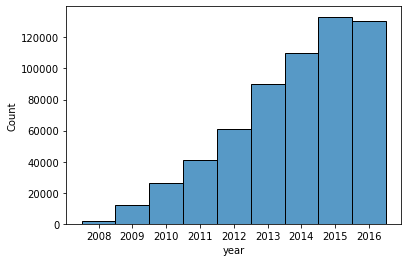

In [55]:
ax = sns.histplot(questions_2, x='year', discrete=True)
ax.set_xticks([x for x in list(range(2008,2017))]);

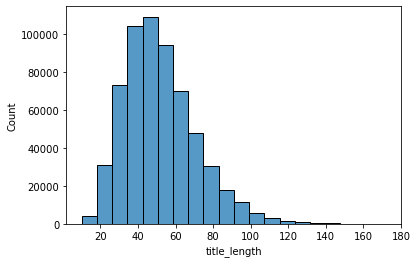

In [58]:
ax = sns.histplot(questions_2, x='title_length', bins=20)

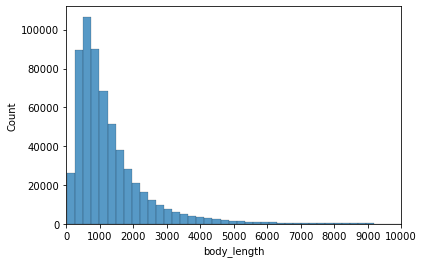

In [67]:
ax = sns.histplot(questions_2, x='body_length', bins=200)
ax.set_xlim(left=0, right=10000);
ax.set_xticks([x for x in list(range(0,11000,1000))]);

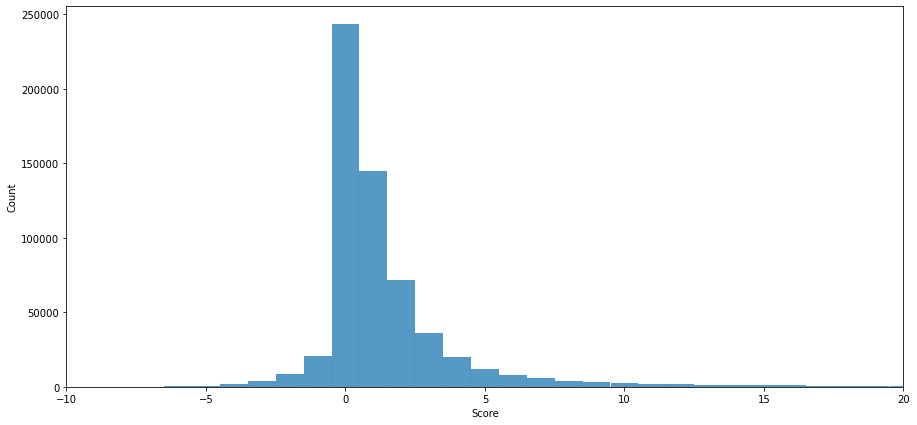

In [78]:
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(questions_2, x='Score', discrete=True)
ax.set_xlim(left=-10, right=20);

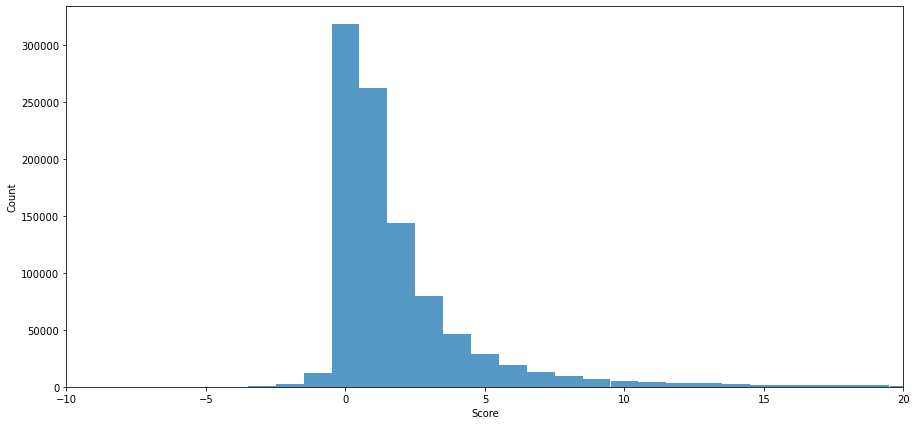

In [79]:
fig = plt.figure(figsize=(15,7))
ax = sns.histplot(answers, x='Score', discrete=True)
ax.set_xlim(left=-10, right=20);

In [10]:
questions_2016 = questions_2[questions_2['year']==2016].copy()

In [11]:
answers_2016 = answers[answers['ParentId'].isin(questions_2016['Id'])].copy()

In [12]:
ids = list(questions_2016['Id'])
questions_2016['answer_count'] = [len(answers_2016[answers_2016['ParentId']==x]) for x in ids]

In [13]:
questions_2016.head()

,Id,OwnerUserId,CreationDate,Score,Title,Body,title_length,body_length,year,answer_count
476742,34552552,5732525.0,2016-01-01T00:00:39Z,2,Selenium Firefox webdriver won't load a blank ...,<p>everyone. </p>\n\n<p>Main question: I am us...,85,1265,2016,1
476743,34552584,5635159.0,2016-01-01T00:07:19Z,1,Is there any chance I got memory leak with pyt...,<p>Happy new year to all of you!\nI trained a ...,73,2105,2016,0
476744,34552670,1876983.0,2016-01-01T00:26:13Z,1,Why is my Runge-Kutta Python script defining e...,"<p>I am a newcomer to Python, my knowledge of ...",87,2107,2016,1
476745,34552671,5731951.0,2016-01-01T00:26:25Z,0,Frequency to Midi Converter python math error,"<p>This is a frequency to midi note converter,...",45,562,2016,2
476746,34552706,4180276.0,2016-01-01T00:35:34Z,0,Stream file to iphone with flask,<p>I am currently doing a file conversion on t...,32,1086,2016,0


In [14]:
questions_2016['avg_answer_score'] = [answers_2016[answers_2016['ParentId']==x]['Score'].mean() for x in ids]

In [15]:
questions_2016['max_answer_score'] = [answers_2016[answers_2016['ParentId']==x]['Score'].max() for x in ids]

In [16]:
questions_2016[['answer_count','avg_answer_score','max_answer_score']].sample(10)

,answer_count,avg_answer_score,max_answer_score
573804,1,2.0,2.0
571772,1,0.0,0.0
487926,2,1.0,1.0
601909,1,2.0,2.0
491807,2,2.5,3.0
517552,2,2.0,4.0
589134,1,0.0,0.0
501635,0,NaN,NaN
524102,0,NaN,NaN
583559,1,0.0,0.0


In [17]:
questions_2016['CreationDate']=pd.to_datetime(questions_2016['CreationDate'], infer_datetime_format=True)

In [18]:
questions_2016.iloc[72333,:]['CreationDate'].dayofweek

5

simple visualizations:
* Distribution of:
    * all Q scores
    * all A scores
    * A counts
    * avg / max A scores for each Q
* Correlation of:
    * Q scores vs. 
        * A count
        * A max/avg scores
        * title/body length
        * day of week / time of day
    * A counts vs.
        * title/body length
        * day of week / time of day
        * 

In [19]:
questions_2016['Score'] = questions_2016['Score'].astype('int64')

In [20]:
questions_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130540 entries, 476742 to 607281
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Id                130540 non-null  int64         
 1   OwnerUserId       130001 non-null  float64       
 2   CreationDate      130540 non-null  datetime64[ns]
 3   Score             130540 non-null  int64         
 4   Title             130540 non-null  object        
 5   Body              130540 non-null  object        
 6   title_length      130540 non-null  int64         
 7   body_length       130540 non-null  int64         
 8   year              130540 non-null  int64         
 9   answer_count      130540 non-null  int64         
 10  avg_answer_score  100751 non-null  float64       
 11  max_answer_score  100751 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(6), object(2)
memory usage: 12.9+ MB


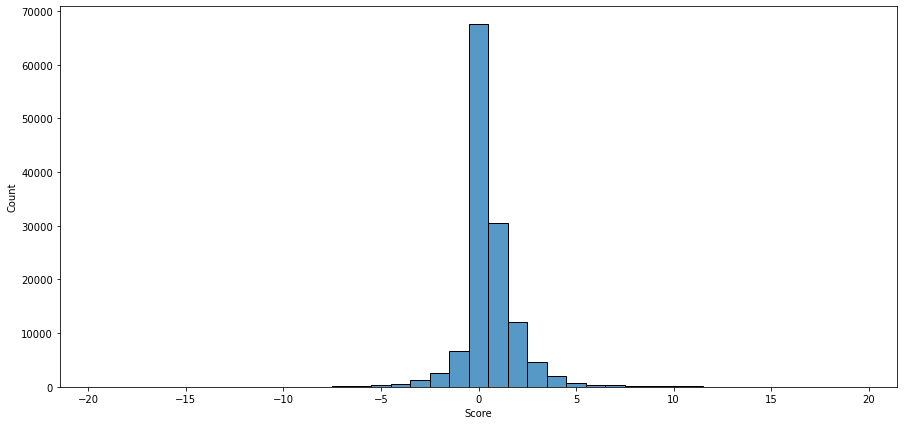

In [91]:
fig = plt.figure(figsize=(15,7))
sns.histplot(questions_2016[questions_2016['Score']<20], x='Score', discrete=True);

In [22]:
questions_2016['Score'].max()

201

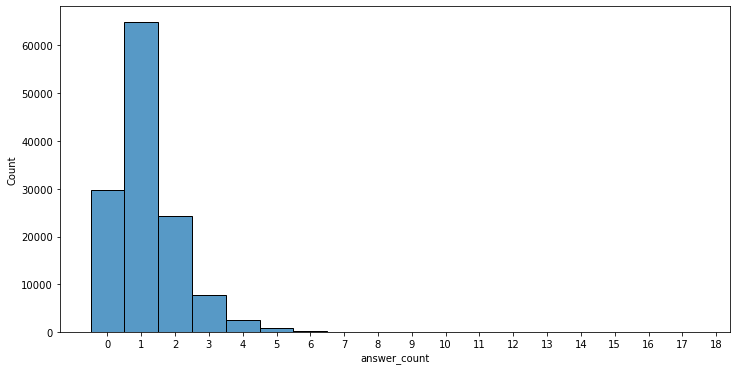

In [87]:
fig = plt.figure(figsize=(12,6))
ax = sns.histplot(questions_2016, x='answer_count', discrete=True)
ax.set_xticks(list(range(19)));

In [34]:
questions_2016['answer_count'].max()

17

In [97]:
from wordcloud import WordCloud, STOPWORDS

In [121]:
def display_wc(text):
    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 8).generate(text)

    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [122]:
titles_0 = ' '.join(list(questions_2016[questions_2016['answer_count']==0]['Title']))
titles_1 = ' '.join(list(questions_2016[questions_2016['answer_count']==1]['Title']))
titles_plus = ' '.join(list(questions_2016[questions_2016['answer_count']>1]['Title']))

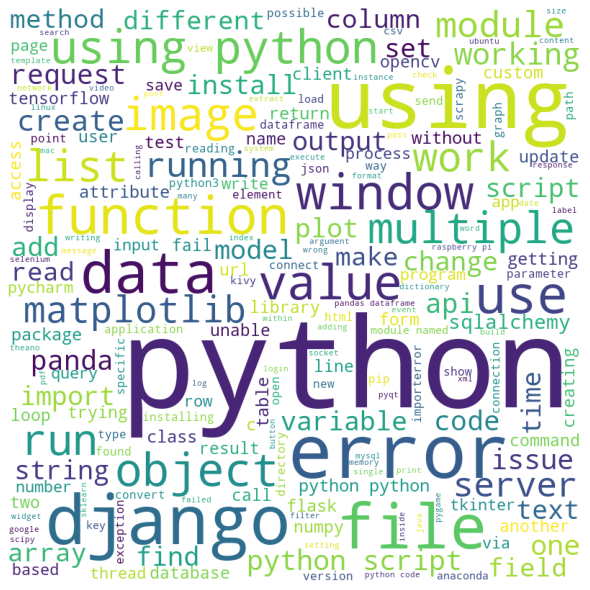

In [123]:
display_wc(titles_0.lower())

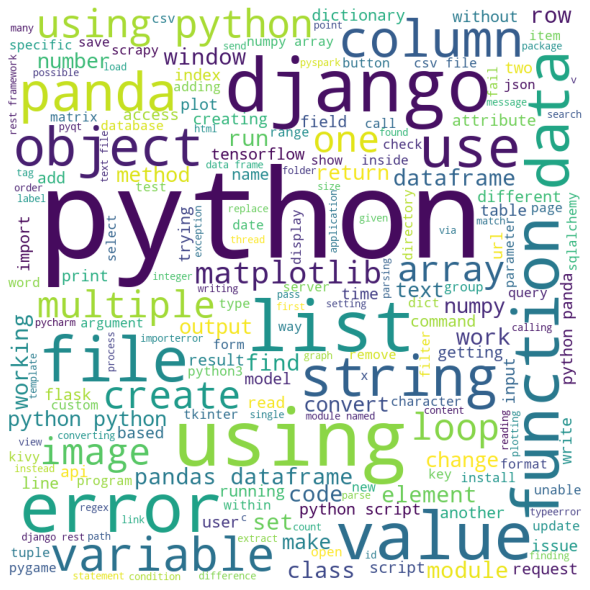

In [124]:
display_wc(titles_1.lower())

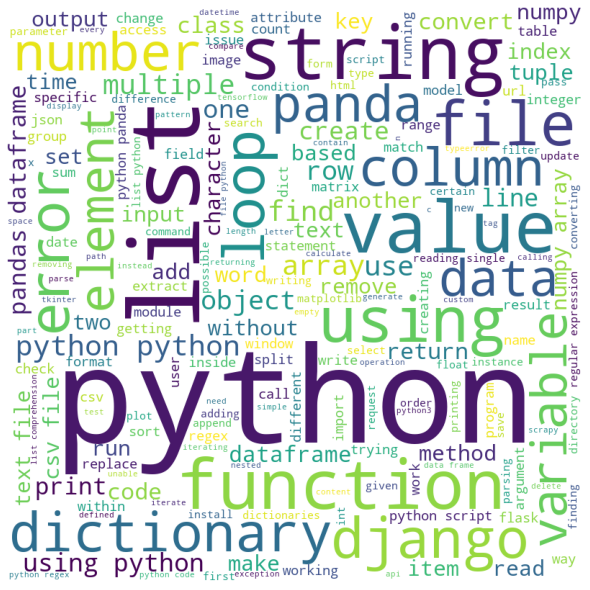

In [125]:
display_wc(titles_plus.lower())